# ANOVA using Python

# What is ANOVA (ANalysis Of VAriance)?
* ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
* Groups mean differences inferred by analyzing variances
* ANOVA uses variance-based F test to check the group mean equality. Sometimes, ANOVA F test is also called omnibus test as it tests non-specific null hypothesis i.e. all group means are equal
* Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
* It is also called univariate ANOVA as there is only one dependent variable in the model. MANOVA is used when there are multiple dependent variables in the dataset. If there is an additional continuous independent variable in the model, then ANCOVA is used.
* If you have repeated measurements for treatments or time on same subjects, you should use Repeated Measure ANOVA
__Note: In ANOVA, group, factors, and independent variables are similar terms__

# ANOVA Hypotheses
* Null hypothesis: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp
* Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal

The null hypothesis is tested using the omnibus test (F test) for all groups, which is further followwd by post-hoc test to see individual group differences.

# ANOVA Assumptions
* Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)
* homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s or Bartlett’s Test)
* Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
* The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).

# How ANOVA works?
* Check sample sizes: equal number of observation in each group
* Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
* Calculate Mean Square error (MSE) (SS error/df of residuals)
* Calculate F value (MS of group/MSE)
* Calculate p value based on F value and degrees of freedom (df)

# ANOVA effect model, table, and formula
The __ANOVA__ table represents between- and within-group sources of variation, and their associated degree of freedoms, the sum of squares (SS), and mean squares (MS). The total variation is the sum of between- and within-group variances. The F value is a ratio of between- and within-group mean squares (MS). p value is estimated from F value and degree of freedoms.

In [1]:
from IPython.core.display import Image, HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

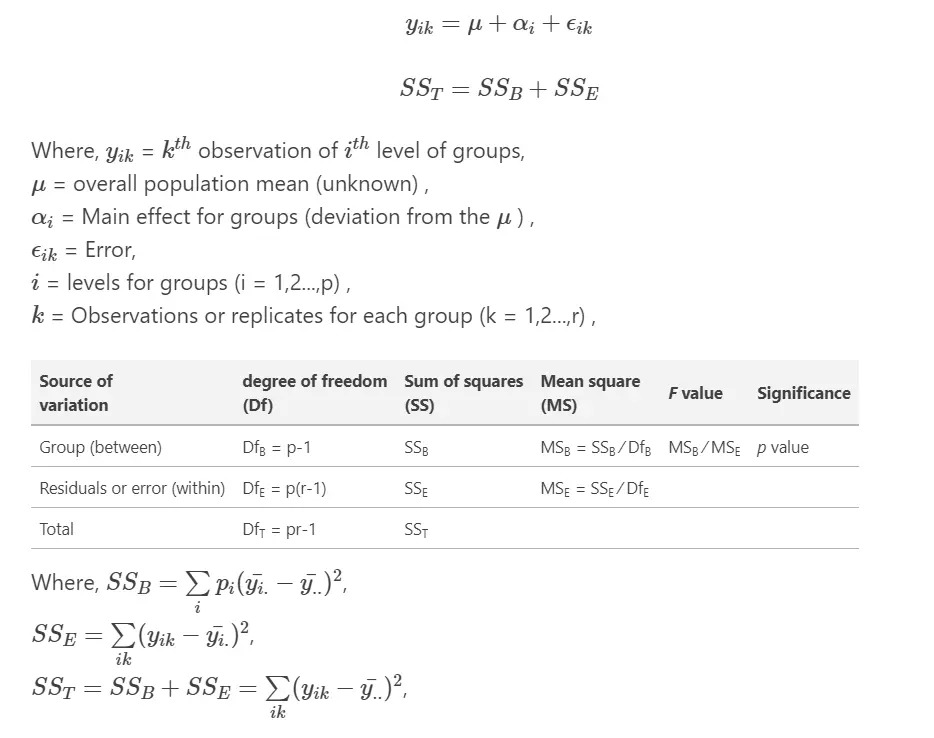

In [2]:
Image("C:/Users/moham/Desktop/one_way_model.jpeg")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

In [5]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [6]:
# replace column names
df_melt.columns = ['index', 'treatments', 'value']
df_melt.head(7)

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55


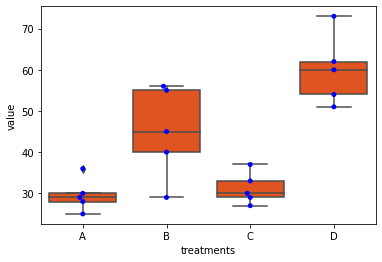

In [7]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='orangered')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='blue')
plt.show()

In [8]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print('The F value is: {:.5f}'.format(fvalue))
print('The P value is: {:.7f}'.format(pvalue))

The F value is: 17.49281
The P value is: 0.0000264


In [9]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
# output (ANOVA F and p value)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [10]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [11]:
# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

# Interpretation
The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

Note on F value: F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

Note: If you have unbalanced (unequal sample size for each group) data, you can perform similar steps as described for one-way ANOVA with balanced design (equal sample size for each group).

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using __Tukey’s honestly significantly differenced (HSD) test__.

__Note__: When the ANOVA is significant, post hoc tests are used to see differences between specific groups. post hoc tests control the family-wise error rate (inflated type I error rate) due to multiple comparisons. post hoc tests adjust the p values (Bonferroni correction) or critical value (Tukey's HSD test).

# Tukey and Tukey-kramer formula

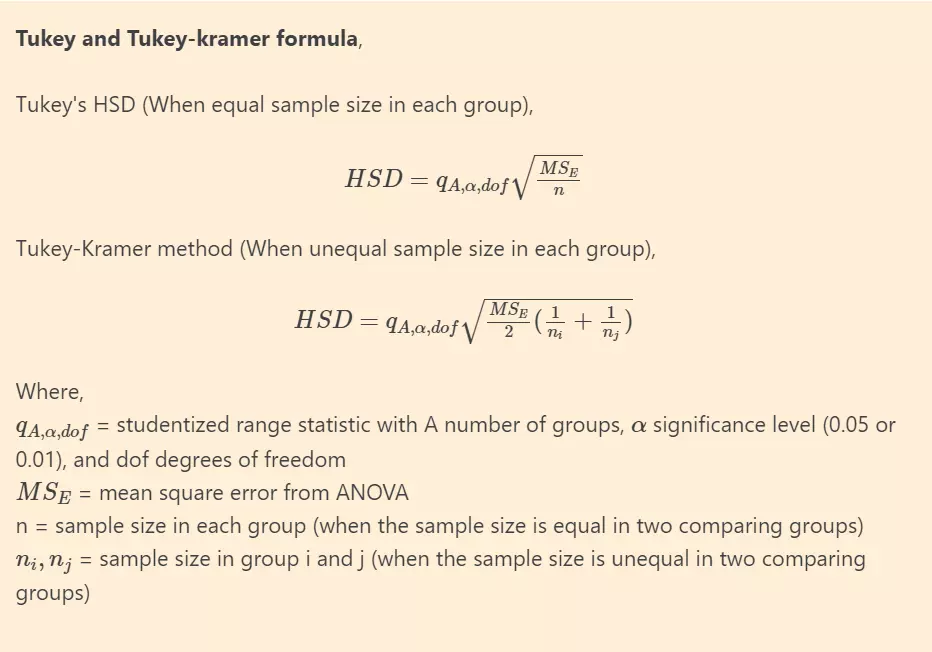

In [12]:
Image("C:/Users/moham/Desktop/tukey.jpeg")

Alternatively, __Scheffe’s method__ is completely coherent with ANOVA and considered as more appropriate __post hoc test__ for significant ANOVA for all unplanned comparisons. However, it is highly conservative than other post hoc tests.

In [13]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary
# output
# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


Above results from Tukey’s HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.

# Test ANOVA assumptions
ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.
The visual approaches perform better than statistical tests. 
For example, __the Shapiro-Wilk test has low power for small sample size data and deviates significantly from normality for large sample sizes (say n > 50)__. For large sample sizes, you should consider to use __QQ-plot__ for normality assumption.
Now, I will generate QQ-plot from standardized residuals (outliers can be easily detected from standardized residuals than normal residuals)

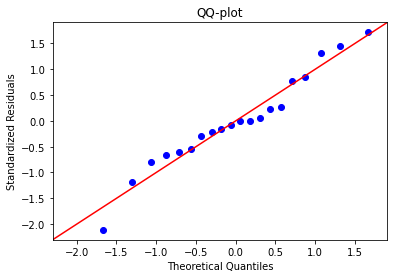

In [14]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('QQ-plot')
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

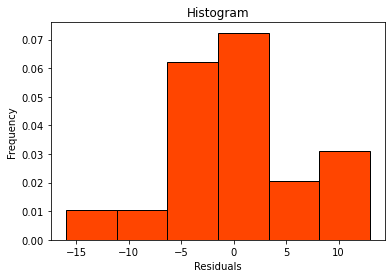

In [15]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar',
         ec='k', color='orangered', density= True) 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

__Shapiro-Wilk test__ can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [16]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print('The Stat of Shapiro is: {:.5f}'.format(w))
print('The P value is: {:.7f}'.format(pvalue))

The Stat of Shapiro is: 0.96850
The P value is: 0.7229773


As the p value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.


In [17]:
import scipy.stats as stats
Bartlett, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print('The Stat of Bartlett is: {:.5f}'.format(Bartlett))
print('The P value is: {:.7f}'.format(pvalue))

The Stat of Bartlett is: 5.68784
The P value is: 0.1278253


In [18]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),5.6878
1,Degrees of freedom (Df),3.0000
2,p value,0.1278


As the p value (0.1278>0.05) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

__Levene’s test__ can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

In [19]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667


As the p value (0.1667>0.05) is non significant, we fail to reject null hypothesis and conclude that treatments are homogene.